# Exploring data

First, we import the necessary libraries that will be needed in further analysis.

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

RANDOM_STATE = 12345

# Turning off warnings
warnings.filterwarnings("ignore")

Now we can read the dataset by uploading data from it to the DataFrame.

In [2]:
data = pd.read_csv("datasets/real_estate_data.csv", sep="\t")
display(data.sample(n=7, random_state=RANDOM_STATE))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20450,7,3490000.0,38.0,2017-12-09T00:00:00,1,NaN,19.0,NaN,18,NaN,...,NaN,NaN,Санкт-Петербург,42554.0,21871.0,0.0,NaN,1.0,756.0,45.0
16544,7,12300000.0,78.5,2018-06-28T00:00:00,2,2.90,24.0,45.0,24,NaN,...,19.0,NaN,Санкт-Петербург,11555.0,12099.0,0.0,NaN,1.0,527.0,181.0
11318,5,9390000.0,107.4,2017-11-12T00:00:00,4,2.60,16.0,67.8,5,NaN,...,13.5,5.0,Санкт-Петербург,33623.0,14722.0,0.0,NaN,1.0,506.0,96.0
22388,5,8050000.0,63.1,2018-08-28T00:00:00,2,2.80,20.0,31.2,10,NaN,...,12.0,2.0,Санкт-Петербург,39771.0,8672.0,1.0,139.0,0.0,NaN,14.0
13953,21,3255000.0,28.2,2017-09-26T00:00:00,0,NaN,24.0,20.0,2,NaN,...,NaN,NaN,Санкт-Петербург,41466.0,11538.0,0.0,NaN,0.0,NaN,119.0
7729,20,16000000.0,248.0,2017-07-25T00:00:00,7,3.32,6.0,166.7,2,NaN,...,25.3,0.0,Санкт-Петербург,20074.0,3147.0,2.0,575.0,3.0,56.0,9.0
10124,6,9000000.0,75.8,2019-01-11T00:00:00,3,2.95,5.0,52.8,2,NaN,...,9.2,NaN,Санкт-Петербург,39872.0,11575.0,1.0,304.0,0.0,NaN,NaN


Since the data in the `real_estate_data.csv` file was initially tab-separated, we specify the tab character `\t` as the value for `sep` parameter in the `read_csv()` function, and, as can be seen from above, after displaying random seven lines by `sample()` method, we make sure that we have a correct DataFrame.

Now let's study the resulting DataFrame in more detail by calling the `info()` method to get more detailed information about the data contained in the `data` variable.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Consider the information retrieved. We have that there are 22 columns in the table that have different data types: `int64`, `float64`, `object` and `bool`. Now let's take a closer look at which columns are contained in `data` and what information they include.

<table>
<thead>
<tr><th>Features</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td><code>total_images</code></td><td><i>Number of photos of the apartment in the ad</i></td></tr>
<tr><td><code>last_price</code></td><td><i>Price at the time of withdrawal from publication</i></td></tr>
<tr><td><code>total_area</code></td><td><i>Total area of the apartment (sq m)</i></td></tr>
<tr><td><code>first_day_exposition</code></td><td><i>Date of publication</i></td></tr>
<tr><td><code>rooms</code></td><td><i>Number of rooms</i></td></tr>
<tr><td><code>ceiling_height</code></td><td><i>Ceiling height (m)</i></td></tr>
<tr><td><code>floors_total</code></td><td><i>Total floors in the house</i></td></tr>
<tr><td><code>living_area</code></td><td><i>Living area (sq m)</i></td></tr>
<tr><td><code>floor</code></td><td><i>Floor</i></td></tr>
<tr><td><code>is_apartment</code></td><td><i>Boolean apartment indicator</i></td></tr>
<tr><td><code>studio</code></td><td><i>Boolean indicator of the studio apartment</i></td></tr>
<tr><td><code>open_plan</code></td><td><i>Boolean indicator of a free layout</i></td></tr>
<tr><td><code>kitchen_area</code></td><td><i>Kitchen area (sq m)</i></td></tr>
<tr><td><code>balcony</code></td><td><i>Number of balconies</i></td></tr>
<tr><td><code>locality_name</code></td><td><i>Name of the locality</i></td></tr>
<tr><td><code>airports_nearest</code></td><td><i>Distance to the nearest airport (m)</i></td></tr>
<tr><td><code>cityCenters_nearest</code></td><td><i>Distance to the city center (m)</i></td></tr>
<tr><td><code>parks_around3000</code></td><td><i>Number of parks within a radius of 3 km</i></td></tr>
<tr><td><code>parks_nearest</code></td><td><i>Distance to the nearest park (m)</i></td></tr>
<tr><td><code>ponds_around3000</code></td><td><i>Number of reservoirs within a radius of 3 km</i></td></tr>
<tr><td><code>ponds_nearest</code></td><td><i>Distance to the nearest reservoir (m)</i></td></tr>
<tr><td><code>days_exposition</code></td><td><i>Duration of ad placement (from publication to withdrawal)</i></td></tr>
</tbody>
</table>

Taking a closer look at the result of executing the method, we also notice that the number of non-null values in the columns differ, which indicates that `data` has missing values that will have to be dealt with at the data preprocessing stage.

Now let's build a histogram for all numeric columns of the DataFrame.

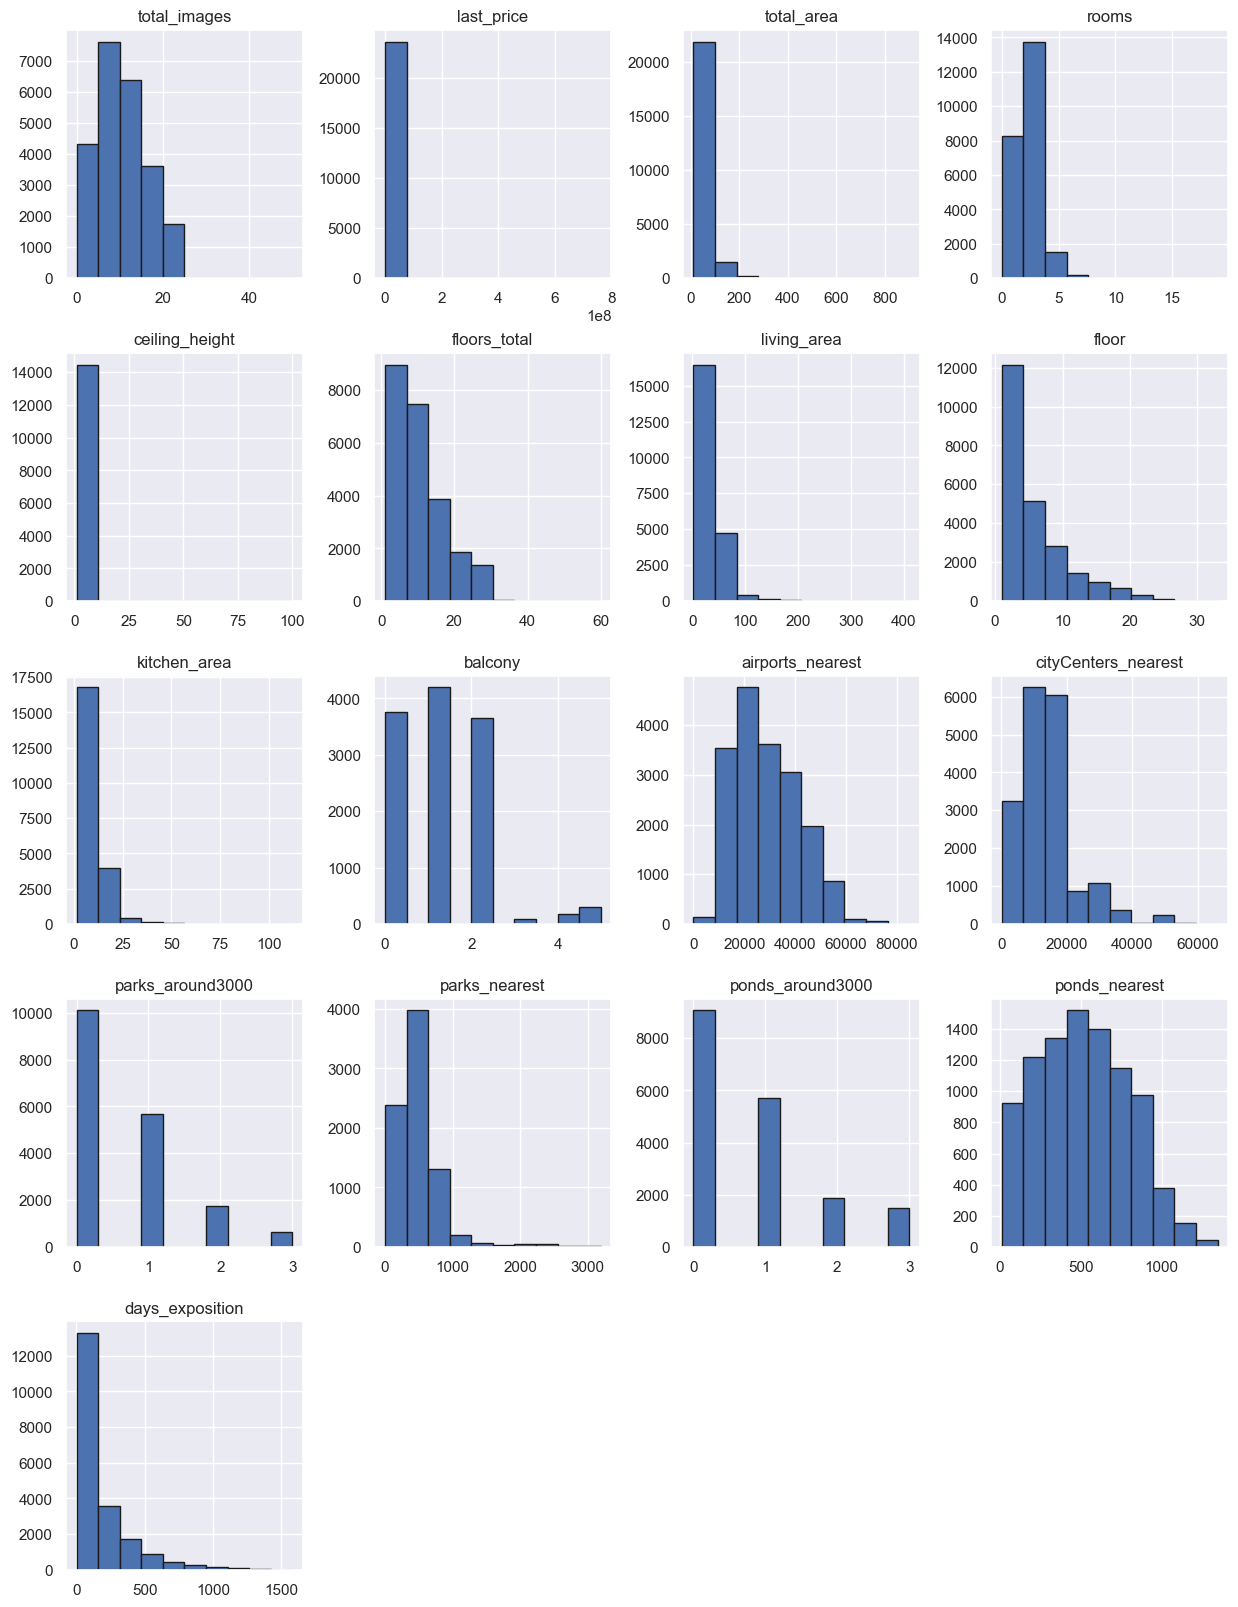

In [4]:
# Setting the style for plots
sns.set_theme(style="darkgrid")

# Plotting histrograms
data.hist(figsize=(15, 20), edgecolor="k")
plt.show()

**Conclusion**

After downloading the existing dataset on real estate objects, it was possible to establish and study what information will be used for the further exploratory data analysis. In particular, the DataFrame is characterized by a fairly extensive variety of features, as well as, importantly, a certain number of missing values. Moreover, there is a possibility of the presence of duplicates, incorrect data format and abnormal values. All of the above problems will be worked out at the next stage.

# Data preprocessing

The next step is data preprocessing, where data should be checked for omissions, correctness of data types, duplicates and anomalies.

## Missing values

We will be checking for missing values multiple times in this section so let's use a function called `identify_missing_values()` that will take the current data as its input and will output a DataFrame with the number and percentage of missing values in such columns, where those with the highest shares of `NaN` values will be placed on top of the table. 

In [5]:
def identify_missing_values(data):
    """Performs missing values computation.

    Function computes a number and share of missing values
    in DataFrame columns which have NaN-values present
    and displays data types of such columns.

    Parameters
    ----------
    data : DataFrame
        DataFrame which needs to be checked for missing values.

    Returns
    -------
    DataFrame or None
        DataFrame with column names/their data types, number of
        missing values and shares of NaN-values in such columns,
        or None if no missing values have been found.
    """
    # Verifying the presence of missing values
    miss_vals_num = data.isnull().sum()[data.isnull().sum() > 0]
    if miss_vals_num.empty:
        return None

    # Creating a table with numbers of missing values
    cols = {"missing_count": miss_vals_num.values}
    nans_df = pd.DataFrame(data=cols, index=miss_vals_num.index).sort_values(
        by="missing_count", ascending=False
    )

    # Adding shares of missing values
    nans_df["missing_fraction"] = nans_df["missing_count"] / data.shape[0]
    nans_df["missing_fraction"] = nans_df["missing_fraction"].round(4)

    # Adding data types
    nans_df["dtype"] = data[nans_df.index].dtypes
    nans_df = nans_df[["dtype", "missing_count", "missing_fraction"]]

    return nans_df

In [6]:
identify_missing_values(data=data)

,dtype,missing_count,missing_fraction
is_apartment,object,20924,0.8829
parks_nearest,float64,15620,0.6591
ponds_nearest,float64,14589,0.6156
balcony,float64,11519,0.4861
ceiling_height,float64,9195,0.3880
airports_nearest,float64,5542,0.2338
cityCenters_nearest,float64,5519,0.2329
parks_around3000,float64,5518,0.2328
ponds_around3000,float64,5518,0.2328
days_exposition,float64,3181,0.1342


It can be seen that the omissions are contained in the following columns of `data`:

1. `ceiling_height`
2. `floors_total`
3. `living_area`
4. `is_apartment`
5. `kitchen_area`
6. `balcony`
7. `locality_name`
8. `airports_nearest`
9. `cityCenters_nearest`
10. `parks_around3000`
11. `parks_nearest`
12. `ponds_around3000`
13. `ponds_nearest`
14. `days_exposition`

In [7]:
# Filling in missing values with zeros
cols_to_fill_zeros = ["balcony", "parks_around3000", "ponds_around3000"]
for col in cols_to_fill_zeros:
    data[col] = data[col].fillna(0)

# Filling in missing values with boolean values
data["is_apartment"] = data["is_apartment"].fillna(False)

# Filling in missing values with median
numeric_cols_to_fill = [
    "ponds_nearest",
    "parks_nearest",
    "airports_nearest",
    "cityCenters_nearest",
    "days_exposition",
]
for numeric_col in numeric_cols_to_fill:
    data[numeric_col] = data[numeric_col].fillna(data[numeric_col].median())

Let's start with the `balcony` column: there is a possibility that the missing values in this column appeared due to the fact that there are simply no balconies in the apartment and instead of specifying a zero value, the data collection system marked it as an empty row. This can be corrected by replacing the missing values in this column with zero. It is possible to apply a similar strategy to the columns `parks_around3000` and `ponds_around3000`. The histograms show that these two columns have a discrete distribution, and therefore, if we assume that an empty value indicates the absence of parks and reservoirs within a radius of three kilometers, then we can also replace such values with zeros. 

The same applies to `is_apartment`: if we make the assumption that the data collection system marked the fact of the real estate object not being an apartment with an empty value, then this error can be corrected by replacing the values of `NaN` with `False`. From a concise summary of the DataFrame, it can be seen that this column has `object` type due to the presence of missing values in it, however, after replacement, it will change its type to `bool`, since afterwards the column will contain only two possible boolean values: `True` or `False`.

Next, we have gaps in the columns with numeric data. Usually in such cases, the missing values are replaced by the median. Take, for example, `days_exposition`: the histogram shows that the distribution is skewed to the right, and therefore it would be more correct to use the median for this column to replace empty values with. We can apply the same strategy to fill in the missing values for the following columns: `ponds_nearest`, `parks_nearest`, `airports_nearest`, `cityCenters_nearest`. Thus, we essentially find the median distances and fill in the missing values with them.

Missing values in some columns cannot be replaced. For example, it is better to leave the missing values in the columns `living_area` and `kitchen_area` untouched, since replacing the values with the median may lead to the fact that for some objects either `total_area` will be less than `living_area`, or the sum of `living_area` and `kitchen_area` will be more than `total area`, which does not make any sense. The same applies to `floors_total`, since it may turn out that the real estate object is on, say, the 15th floor, although the median total number of floors in the house is 9. Such substitutions can distort the data and lead to incorrect results. Next, consider the `ceiling_height` column, which is distorted by abnormal values formed as a result of incorrect data entry. Using the median to fill in the missing values will exaggerate the estimate of the median ceiling height, so for now it is better to leave the empty values untouched. The omissions in `locality_name` are also not so obviously fixable: the location in the missing cell can be anything, it is not possible to make a guess. In fact, since there are not so many missing values here, we can replace the omissions in this column with some one value, which will be done later in the process of removing implicit duplicates.

In [8]:
identify_missing_values(data=data)

,dtype,missing_count,missing_fraction
ceiling_height,float64,9195,0.3880
kitchen_area,float64,2278,0.0961
living_area,float64,1903,0.0803
floors_total,float64,86,0.0036
locality_name,object,49,0.0021


Thus, it proved possible to detect a fairly large number of missing values. There can be many reasons for this, the most obvious of which is the failure of the automated information collection system: for example, the form that the user fills out could have marked something wrong, which led to missing data. Another reason may be related to the person who placed the ad: they could simply not specify all the data.

## Data types

Let's now take another look at the column types of the DataFrame to understand whether it is necessary to perform type conversion.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Several columns require data type conversion. First, `first_day_exposition` contains a timestamp and has `object` type, and it would be logical to convert it to `datetime64` type. Next, the data type in the columns `days_exposition`, `balcony`, `park_around3000` and `ponds_around3000` is specified as `float64`. It is worth converting their types to `int64`, because the values in these columns cannot be fractional. It is worth saying that `floors_total` should also have an integer data type, but due to the fact that there are missing values in the column, we will leave this column as it is (we will apply the type conversion later after deleting the missing values, since the `NaN` values are of the `float` type, and therefore converting this column to the `int64` type will lead to a `ValueError`). Lastly, the value of real estate object can also not be written as fractional, since the prices are usually specified as some integer value and, hence, we also convert this column to `int64`.

In [10]:
# Conversion to datetime
data["first_day_exposition"] = pd.to_datetime(
    data["first_day_exposition"], format="%Y-%m-%dT%H:%M:%S"
)

# Conversion to int64
cols_types_to_convert = [
    "balcony",
    "parks_around3000",
    "ponds_around3000",
    "days_exposition",
    "last_price",
]
for col in cols_types_to_convert:
    data[col] = data[col].astype("int64")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

After converting the types, we called the `info()` method again and see that where it was necessary to change the data type, they were successfully converted.

## Duplicates

Now we need to deal with possible implicit duplicates that are present in the names of localities in the `locality_name` column. First let's take a look at the unique names.

In [12]:
# Displaying unique names of cities and localities
unique_localities = data["locality_name"].sort_values().unique()
print(unique_localities)

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

Some duplicates are visible in the given array of names. For example, names including `поселок` and `посёлок` (types of localities) with the same name of a locality are implicit duplicates due to the fact that only the type of locality is written differently. The same duplicates are present where the locality type, in particular, includes `городского типа`, `станции`, `деревня`. 

In other words, there are locality names where the names of the localities themselves are the same, but have differently written types of settlements. In order to remove such implicit duplicates, we can, as one of the options, simply remove the type of locality from the full name of the location, thus leaving only the name of the location. For example, to turn `поселок городского типа Рябово` into `Рябово`. This will lead to the fact that we will have many unique names of locations and zero duplicates. This task can be solved quite easily by creating a function `adjust_locality_name()`, which will go through each location name, remove the locality type from the full name and leave only the name of the locality. In addition, if the function encounters the value `NaN`, we will replace this value with `Неизвестно` (Unknown), thus sorting out the omissions in this column.

In [13]:
def adjust_locality_name(locality_name):
    """Strips locality type from the full locality name."""
    # Listing possible locality types
    location_types = [
        "поселок городского типа",
        "посёлок городского типа",
        "городской поселок",
        "городской посёлок",
        "поселок при железнодорожной станции",
        "посёлок при железнодорожной станции",
        "поселок станции",
        "посёлок станции",
        "коттеджный посёлок",
        "коттеджный поселок",
        "деревня",
        "садовое товарищество",
        "садоводческое некоммерческое товарищество",
        "поселок",
        "посёлок",
        "село",
    ]
    # Deleting locality type
    try:
        # Going through each possible type in `location_types`
        for location_type in location_types:
            # If location type is present in locality name, take only its name
            if location_type in locality_name:
                locality_name_splitted = locality_name.split(location_type + " ")
                locality_name = locality_name_splitted[-1]
                # Stopping upon reaching this block, going to the next value
                break
        return locality_name
    # In case encountering NaN-values when TypeError is raised
    except TypeError:
        # Getting replaced with 'Неизвестно' ('Unknown')
        return "Неизвестно"

After writing the function, we can apply it using the `apply()` method to the existing column with the names of localities `locality_name`.

In [14]:
# Applying the function to the DataFrame column
data["locality_name"] = data["locality_name"].apply(adjust_locality_name)

Let's see if it was possible to delete all the implicit duplicates.

In [15]:
# Displaying unique locality names without duplicates (no locality types)
print(data["locality_name"].sort_values().unique())

['Агалатово' 'Александровская' 'Алексеевка' 'Аннино' 'Аро' 'Барышево'
 'Батово' 'Бегуницы' 'Белогорка' 'Белоостров' 'Бокситогорск'
 'Большая Вруда' 'Большая Ижора' 'Большая Пустомержа' 'Большие Колпаны'
 'Большое Рейзино' 'Большой Сабск' 'Бор' 'Борисова Грива' 'Бугры'
 'Будогощь' 'Ваганово' 'Важины' 'Вартемяги' 'Вахнова Кара' 'Вещево'
 'Виллози' 'Вознесенье' 'Возрождение' 'Войсковицы' 'Войскорово'
 'Володарское' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Вырица'
 'Выскатка' 'Высокоключевой' 'Высоцк' 'Гаврилово' 'Гарболово' 'Гатчина'
 'Гладкое' 'Глажево' 'Глебычево' 'Глинка' 'Гончарово' 'Горбунки'
 'Гостилицы' 'Громово' 'Дзержинского' 'Дружная Горка' 'Дружноселье'
 'Дубровка' 'Елизаветино' 'Ефимовский' 'Жилгородок' 'Жилпосёлок' 'Житково'
 'Заводской' 'Заклинье' 'Заневка' 'Запорожское' 'Зеленогорск' 'Зимитицы'
 'Ивангород' 'Извара' 'Ильичёво' 'Иссад' 'Калитино' 'Каложицы' 'Кальтино'
 'Каменногорск' 'Камышовка' 'Каськово' 'Келози' 'Кивеннапа Север'
 'Кикерино' 'Кингисепп' 'Кингисеппский' 

It can be seen that now we have only the names of locations and at first glance no implicit duplicates. Moreover, the omissions seen earlier above were replaced by one value, which is also visible in the given array of locations.

## Anomalies

The next step is to eliminate anomalies that may be present in the DataFrame columns. The first such candidate is `ceiling_height`, since its histogram clearly shows a slightly prominent and detached column in the region of values 20-25, which suggests the possible presence of anomalies in this column. Let's take a look at its unique values.

In [16]:
print(data["ceiling_height"].sort_values().unique())

[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3.8    3.82   3.83   3.84   3.85   3.86
   3.8

It can be seen that there are several anomalous values here: the ceiling height cannot be higher than 11 meters (in elite houses and apartments this value can be a maximum of 10.3 meters). Therefore, let's assume that in fact such high values are caused by incorrect data entry and divide the values above 10.3 meters by 10. This can be done by writing the function `adjust_ceiling_height()`.

In [17]:
def adjust_ceiling_height(ceil_height):
    """Adjusts anomalous ceiling heights."""
    try:
        # Adjusting height if height > 10.3m
        if ceil_height > 10.3:
            ceil_height = ceil_height / 10
        return ceil_height
    except:
        # if NaN, doing nothing
        pass

Next, we apply this function to the corresponding column and save the results of the function in the same column `ceiling_height`.

In [18]:
data["ceiling_height"] = data["ceiling_height"].apply(adjust_ceiling_height)

Now we can take a look at the unique values.

In [19]:
print(data["ceiling_height"].sort_values().unique())

[ 1.    1.2   1.4   1.75  2.    2.2   2.25  2.26  2.3   2.34  2.4   2.45
  2.46  2.47  2.48  2.49  2.5   2.51  2.52  2.53  2.54  2.55  2.56  2.57
  2.58  2.59  2.6   2.61  2.62  2.63  2.64  2.65  2.66  2.67  2.68  2.69
  2.7   2.71  2.72  2.73  2.74  2.75  2.76  2.77  2.78  2.79  2.8   2.81
  2.82  2.83  2.84  2.85  2.86  2.87  2.88  2.89  2.9   2.91  2.92  2.93
  2.94  2.95  2.96  2.97  2.98  2.99  3.    3.01  3.02  3.03  3.04  3.05
  3.06  3.07  3.08  3.09  3.1   3.11  3.12  3.13  3.14  3.15  3.16  3.17
  3.18  3.2   3.21  3.22  3.23  3.24  3.25  3.26  3.27  3.28  3.29  3.3
  3.31  3.32  3.33  3.34  3.35  3.36  3.37  3.38  3.39  3.4   3.42  3.43
  3.44  3.45  3.46  3.47  3.48  3.49  3.5   3.51  3.52  3.53  3.54  3.55
  3.56  3.57  3.58  3.59  3.6   3.62  3.63  3.65  3.66  3.67  3.68  3.69
  3.7   3.75  3.76  3.78  3.8   3.82  3.83  3.84  3.85  3.86  3.87  3.88
  3.9   3.93  3.95  3.98  4.    4.06  4.1   4.14  4.15  4.19  4.2   4.25
  4.3   4.37  4.4   4.45  4.5   4.65  4.7   4.8   4.

As can be seen, now the maximum possible height is 10.3 meters. However, there may be other anomalies here. The ceiling height of less than 2 meters also seems a little strange. Let's take a look at such rows from the DataFrame by displaying them on the screen.

In [20]:
# Displaying real estate objects with ceiling height less than 2 meters
display(data[data["ceiling_height"] < 2])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000,42.8,2017-08-14,2,1.20,2.0,27.5,1,False,...,5.20,0,Мга,26726.0,13098.5,0,455.0,0,502.0,248
15061,19,5600000,56.4,2018-05-11,2,1.40,14.0,32.4,5,False,...,9.10,2,Санкт-Петербург,14814.0,13610.0,0,455.0,0,502.0,315
16934,5,4100000,40.0,2017-10-17,1,1.75,37.0,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0,455.0,3,80.0,71
22590,16,6000000,55.0,2018-10-31,2,1.00,12.0,32.4,7,False,...,10.00,0,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13


There are only 4 such objects, which is not so much on the scale of the entire dataset, so we will delete such rows using the `drop()` method by specifying the corresponding row indexes.

In [21]:
# Deleting anomalous rows
data.drop(data[data["ceiling_height"] < 2].index, inplace=True)

In [22]:
print(data["ceiling_height"].sort_values().unique())

[ 2.    2.2   2.25  2.26  2.3   2.34  2.4   2.45  2.46  2.47  2.48  2.49
  2.5   2.51  2.52  2.53  2.54  2.55  2.56  2.57  2.58  2.59  2.6   2.61
  2.62  2.63  2.64  2.65  2.66  2.67  2.68  2.69  2.7   2.71  2.72  2.73
  2.74  2.75  2.76  2.77  2.78  2.79  2.8   2.81  2.82  2.83  2.84  2.85
  2.86  2.87  2.88  2.89  2.9   2.91  2.92  2.93  2.94  2.95  2.96  2.97
  2.98  2.99  3.    3.01  3.02  3.03  3.04  3.05  3.06  3.07  3.08  3.09
  3.1   3.11  3.12  3.13  3.14  3.15  3.16  3.17  3.18  3.2   3.21  3.22
  3.23  3.24  3.25  3.26  3.27  3.28  3.29  3.3   3.31  3.32  3.33  3.34
  3.35  3.36  3.37  3.38  3.39  3.4   3.42  3.43  3.44  3.45  3.46  3.47
  3.48  3.49  3.5   3.51  3.52  3.53  3.54  3.55  3.56  3.57  3.58  3.59
  3.6   3.62  3.63  3.65  3.66  3.67  3.68  3.69  3.7   3.75  3.76  3.78
  3.8   3.82  3.83  3.84  3.85  3.86  3.87  3.88  3.9   3.93  3.95  3.98
  4.    4.06  4.1   4.14  4.15  4.19  4.2   4.25  4.3   4.37  4.4   4.45
  4.5   4.65  4.7   4.8   4.9   5.    5.2   5.3   5

Now, after we have put this column in order, we can calculate the median height of the ceiling and fill in the missing values with it. Specifically, we will fill in missing values with median ceiling height depending on the number of floors in a building as well as location of the object. Not all missing values will be worked out using this method (there are still missing values in `ceiling_height`) so we will just fill in the remaining ones by taking a median for the entire ceiling heights column.

In [23]:
# Filling in missing ceiling height values
data["ceiling_height"] = data.groupby(["locality_name", "floors_total"])[
    "ceiling_height"
].apply(lambda x: x.fillna(x.median()))

# Filling in the remaining missing values
data["ceiling_height"] = data["ceiling_height"].fillna(data["ceiling_height"].median())

In [24]:
identify_missing_values(data=data)

,dtype,missing_count,missing_fraction
kitchen_area,float64,2278,0.0961
living_area,float64,1903,0.0803
floors_total,float64,86,0.0036


Looking at the histograms of the other columns, other anomalies are not so obviously visible, so let's assume that there are none in the other columns, and proceed to deleting the missing values.

## Removing missing values

The last stage of data preprocessing is the removal of missing values, that is, in this case, those where it is not possible to come up with a logical replacement. After all the actions performed, the missing values remained in three columns: `floors_total`, `living_area` and `kitchen_area`. For the reasons given above, filling in the values in these columns with the corresponding medians will lead to unrealistic features of objects, so we will delete the rows with missing values.

In [25]:
# DataFrame length before deletion
df_rows_before = data.shape[0]

In [26]:
data.dropna(subset=["floors_total", "living_area", "kitchen_area"], inplace=True)

In [27]:
# DataFrame length after deletion
df_rows_after = data.shape[0]

In [28]:
print("Number of rows before deletion: {:,}".format(df_rows_before))
print("Number of rows after deletion: {:,}\n".format(df_rows_after))
print(
    "Number of rows deleted: {0:,} ({1:.0%})".format(
        df_rows_before - df_rows_after,
        (df_rows_before - df_rows_after) / df_rows_before,
    )
)

Number of rows before deletion: 23,695
Number of rows after deletion: 20,939

Number of rows deleted: 2,756 (12%)


So, we had to delete 2756 rows (12%). Such a number of deleted lines is certainly a lot, but this is the necessity that we will have to deal with in order to get accurate and correct research results. The last thing left to do is to change the data type in the `floors_total` column to integer, which now will not lead to an error after deleting the missing values.

In [29]:
data["floors_total"] = data["floors_total"].astype("int64")

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20939 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20939 non-null  int64         
 1   last_price            20939 non-null  int64         
 2   total_area            20939 non-null  float64       
 3   first_day_exposition  20939 non-null  datetime64[ns]
 4   rooms                 20939 non-null  int64         
 5   ceiling_height        20939 non-null  float64       
 6   floors_total          20939 non-null  int64         
 7   living_area           20939 non-null  float64       
 8   floor                 20939 non-null  int64         
 9   is_apartment          20939 non-null  bool          
 10  studio                20939 non-null  bool          
 11  open_plan             20939 non-null  bool          
 12  kitchen_area          20939 non-null  float64       
 13  balcony         

In [31]:
identify_missing_values(data=data)

Lastly, let's check for explicit duplicates, that is, for identical rows.

In [32]:
def preprocess_duplicates(data):
    """Deletes duplicates from a DataFrame."""
    # Computing the number of duplicates in DataFrame
    num_duplicates = data.duplicated().sum()
    # Checking the number of duplicates for nullity
    if num_duplicates != 0:
        # Deleting duplicates
        data.drop_duplicates(inplace=True)
        # Displaying a message attesting the deletion
        print(f"{num_duplicates:,} duplicates found and deleted.")
        return None
    return None

In [33]:
preprocess_duplicates(data=data)

**Conclusion**

At the stage of data preprocessing, the following problems were identified:

* Missing values
* Incorrect data types
* Implicit duplicates
* Anomalies

The missing values, where it was possible and logically sound to come up with a replacement strategy, were filled with the corresponding values depending on the distribution of columns. Furthermore, in some columns, in particular in the column with timestamps, the type was converted. The fact of the presence of implicit duplicates in the column with the names of locations was established and their removal was carried out by leaving only the name of the location. Finally, it was shown that the column containing the ceiling height has abnormal values, to which the restoration procedure was also applied. As a result, at the end of this stage, the missing values were removed in order to obtain correct research results and make appropriate visualizations.

# Adding new data

Let's add new columns to the DataFrame.

In [34]:
# Price per one square meter
data["price_per_sq_meter"] = data["last_price"] / data["total_area"]

# Weekday of ad publication
data["weekday_exposition"] = data["first_day_exposition"].dt.weekday

# Month of ad publication
data["month_exposition"] = data["first_day_exposition"].dt.month

# Year of ad publication
data["year_exposition"] = data["first_day_exposition"].dt.year

# Distance to city center in kilometers
data["cityCenters_nearest_km"] = (data["cityCenters_nearest"] / 1000).astype("int64")

In order to determine the type of floor, we will have to write a separate function `categorize_floors()`, which will categorize floors by:

* Первый (First)
* Последний (Last)
* Другой (Other)

In [35]:
def categorize_floors(df):
    """Classifies floors into 'first', 'second' and 'other' floor categories."""
    # Working only with two columns
    floors_total = df["floors_total"]
    floor = df["floor"]

    # Returning "first" category
    if floor == 1:
        return "First"
    else:
        # Returning "last" category
        if floor == floors_total:
            return "Last"
        # Returning "other" category
        return "Other"

In [36]:
# Applying the function to the entire DataFrame
data["floor_type"] = data.apply(categorize_floors, axis=1)

In [37]:
display(data.sample(5, random_state=RANDOM_STATE))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,weekday_exposition,month_exposition,year_exposition,cityCenters_nearest_km,floor_type
7245,13,5050000,47.5,2016-08-12,2,2.6,9,31.00,1,False,...,40.0,1,734.0,914,106315.789474,4,8,2016,9,First
14982,8,2800000,54.3,2017-11-10,2,2.6,5,30.10,5,False,...,455.0,0,502.0,74,51565.377532,4,11,2017,13,Last
3424,19,7500000,75.6,2016-04-17,3,2.6,16,45.72,16,False,...,455.0,0,502.0,119,99206.349206,6,4,2016,9,Last
4618,15,14500000,92.2,2018-07-14,3,2.8,12,60.00,7,False,...,455.0,0,502.0,95,157266.811280,5,7,2018,14,Other
6414,14,9500000,100.0,2018-02-15,4,3.0,6,45.50,3,False,...,183.0,3,315.0,20,95000.000000,3,2,2018,2,Other


**Conclusion**

At this intermediate stage, the following columns have been added to the DataFrame:

* `price_per_sq_meter` - price per square meter;
* `weekday_exposition` - the day of the week the ad was published;
* `month_exposition` - month of publication of the ad;
* `year_exposition` - the year of publication of the ad;
* `cityCenters_nearest_km` - distance to the city center in kilometers;
* `floor_type` - indicator of the first, last or other floor.

# Exploratory data analysis

## Plotting histograms

Next, let's start conducting exploratory data analysis and consider the following columns:

* `total_area`
* `living_area`
* `kitchen_area`
* `last_price`
* `rooms`
* `ceiling_height`
* `floor`
* `floor_type`
* `floors_total`
* `cityCenters_nearest`
* `airports_nearest`
* `parks_nearest`
* `weekday_exposition`
* `month_exposition`

Let's build histograms for each attribute by focusing on numeric and categorical columns separately.

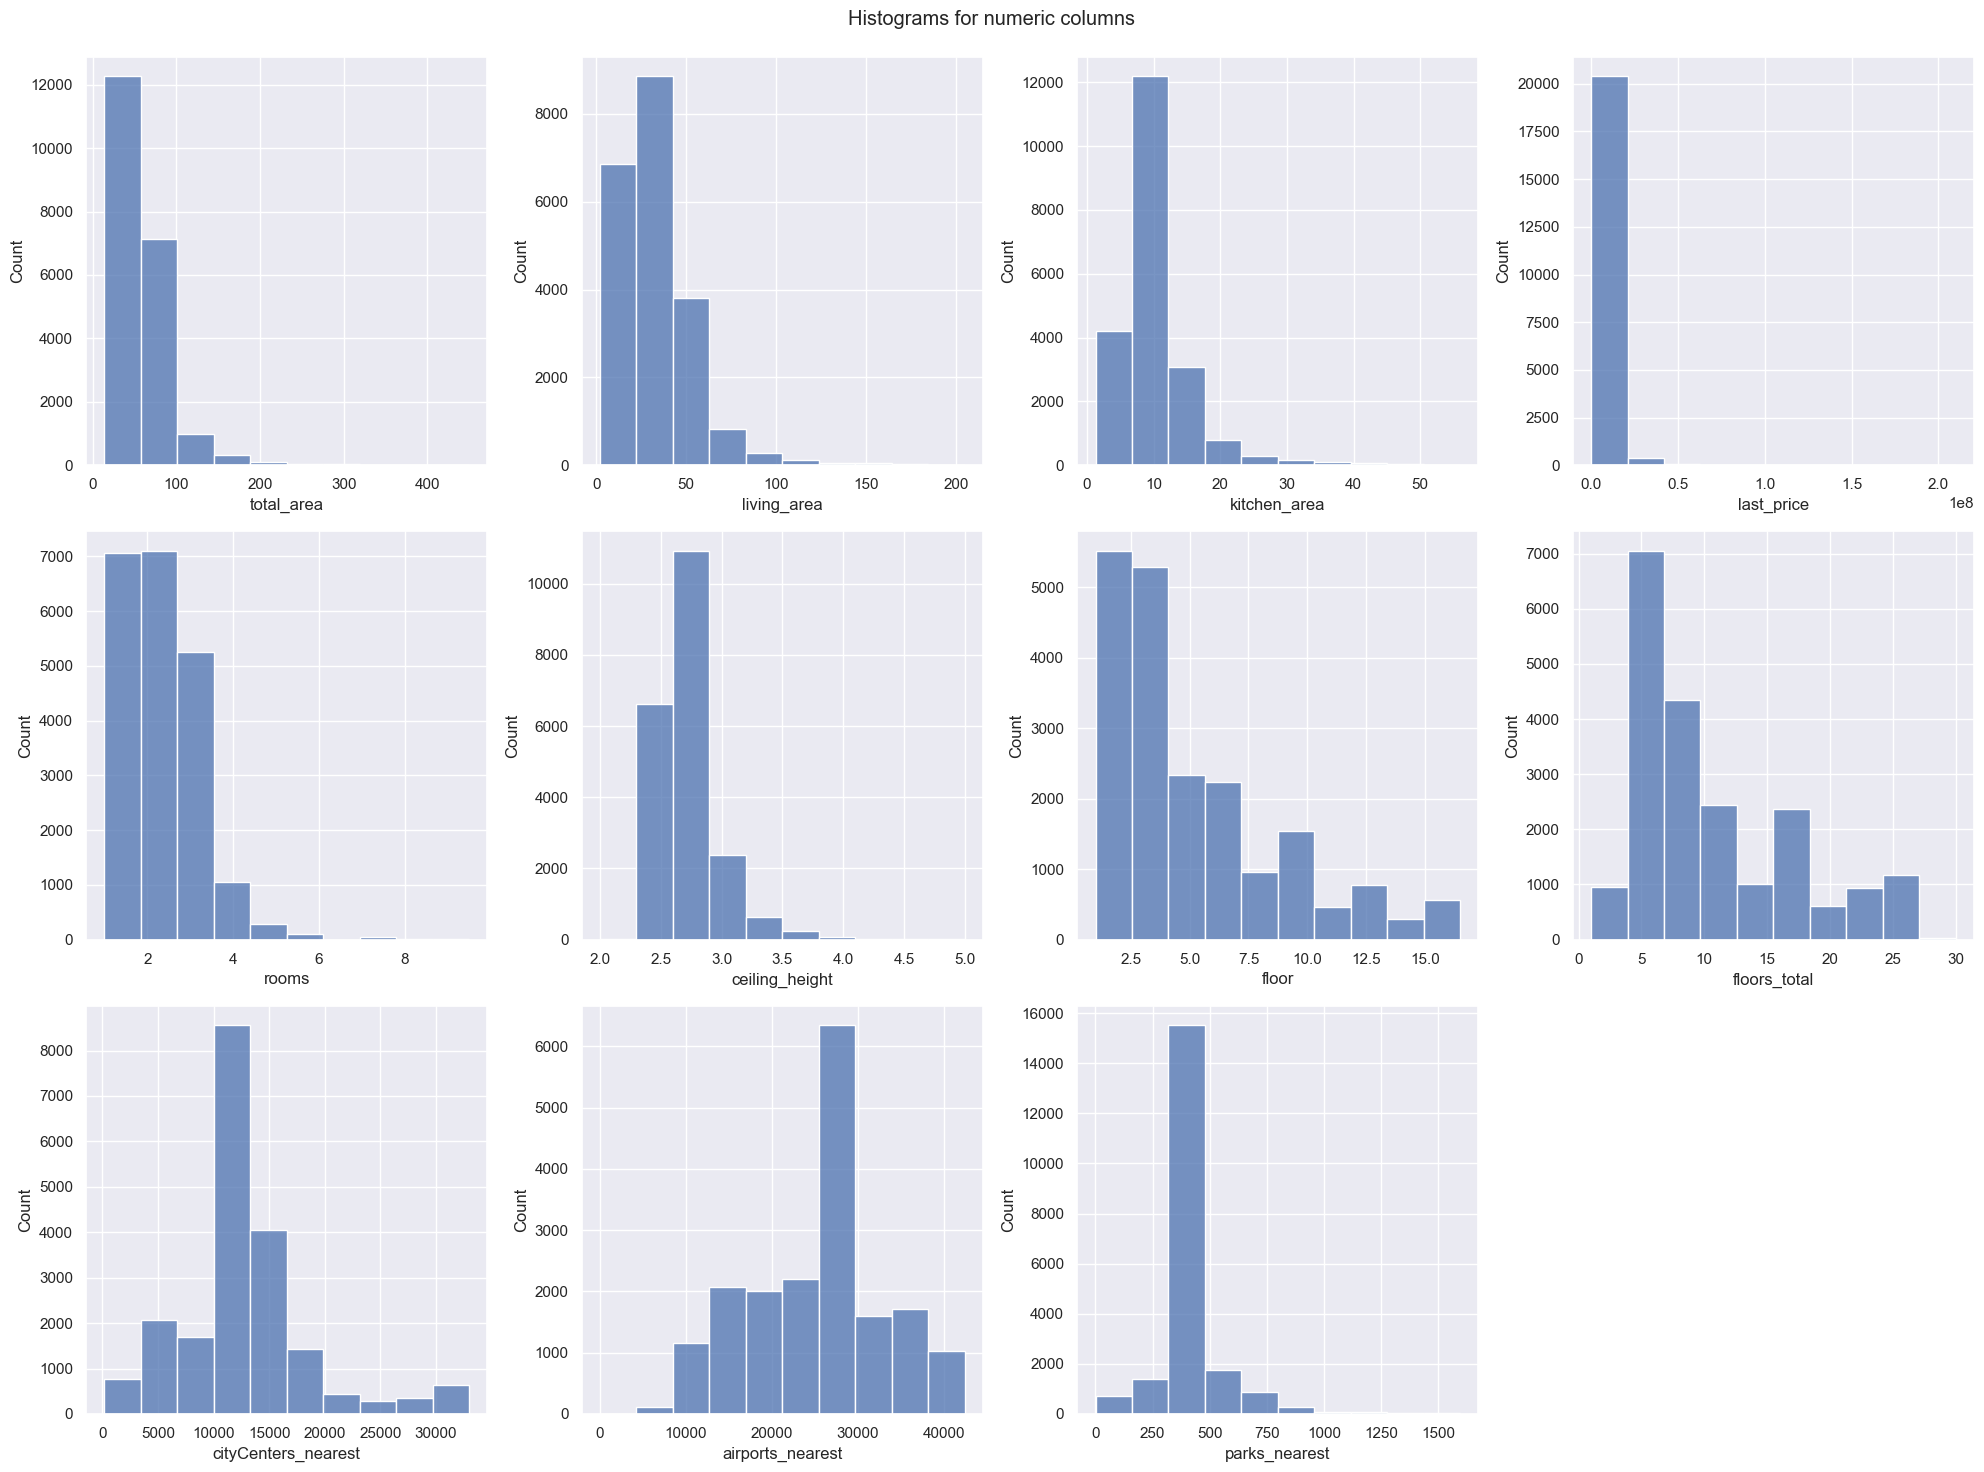

In [38]:
# Defining numeric columns to plot
numeric_columns = [
    "total_area",
    "living_area",
    "kitchen_area",
    "last_price",
    "rooms",
    "ceiling_height",
    "floor",
    "floors_total",
    "cityCenters_nearest",
    "airports_nearest",
    "parks_nearest",
]

# Plotting histograms
fig, axes = plt.subplots(3, 4, figsize=(5 * 4, 5 * 3))
fig.suptitle("Histograms for numeric columns\n")
axes = axes.reshape(
    12,
)
axes[-1].axis("off")
for col, ax in zip(numeric_columns, axes):
    if ax != axes[-1]:
        sns.histplot(
            data=data,
            bins=10,
            x=col,
            ax=ax,
            binrange=(np.min(data[col]), np.max(data[col]) / 2),
        )
    else:
        break
plt.tight_layout()
plt.show()

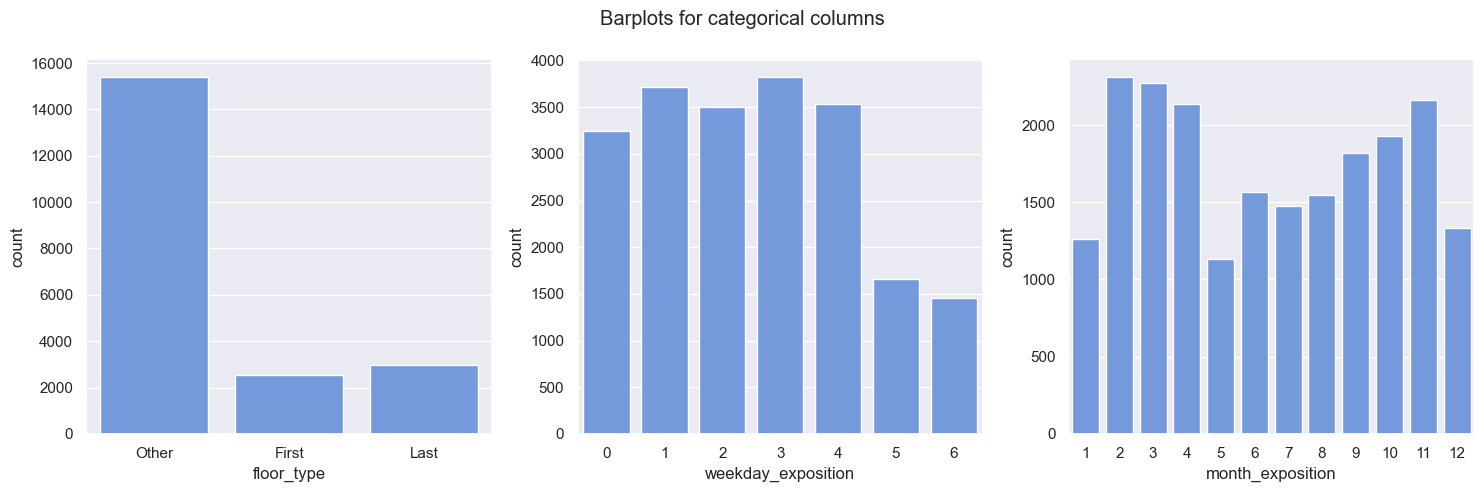

In [39]:
# Defining categorical columns to plot
categorical_columns = ["floor_type", "weekday_exposition", "month_exposition"]

# Plotting barplots
fig, axes = plt.subplots(1, 3, figsize=(5 * 3, 5 * 1))
fig.suptitle("Barplots for categorical columns")
for col, ax in zip(categorical_columns, axes):
    sns.countplot(x=col, data=data, ax=ax, color="cornflowerblue")
plt.tight_layout()
plt.show()

So, having built histograms, we can see that almost all histograms of numeric columns have a right-skewed distribution. In particular, the range of the most frequent values for this type of columns is clearly visible. As for categorical columns, that is, columns with a limited number of values that they can take, here in this case these are columns denoting the day of the week of publication, the month of publication and the type of floor. We can see that people mostly sell real estate that is located on any floor except the first and the last - specifically, the other floor. Ads are most often placed on weekdays in autumn-winter-spring (November, February, March, April).

## Real estate objects turnover

The next stage of the analysis is to study how quickly apartments are sold in terms of the number of days of ads being published, which can be done by carefully examining the column `days_exposition`. First, let's build a histogram and find descriptive statistics (including the mean and median) for this column.

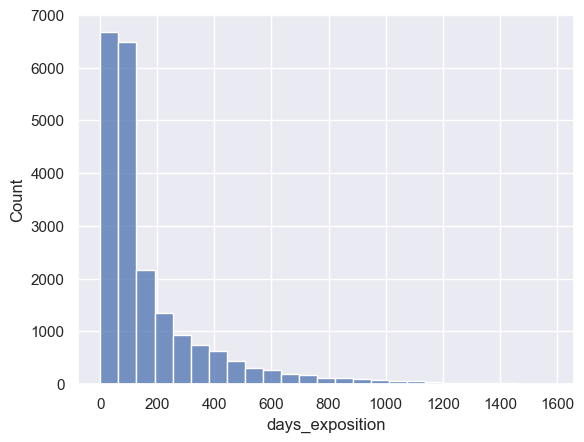

In [40]:
sns.histplot(data=data, x="days_exposition", bins=25)
plt.show()

In [41]:
# Computing discriptive statistics
data["days_exposition"].describe()

count    20939.000000
mean       173.168394
std        208.510292
min          1.000000
25%         48.000000
50%         95.000000
75%        205.000000
max       1580.000000
Name: days_exposition, dtype: float64

We can see from the histogram that the distribution is skewed to the right, which manifests itself in a large difference between the mean (173.2) and median (95.0). The distribution graph is quite far from normal and looks more like a Poisson distribution. We can observe a large column for the initial values of `days_exposition`, which refers to a large number of real estate objects whose sale period is equal to the median, that is, 95 days.

However, it is worth returning to the issue of the speed of real estate sales. We can answer this question by constructing a diagram using the `boxplot()` method for the column in question.

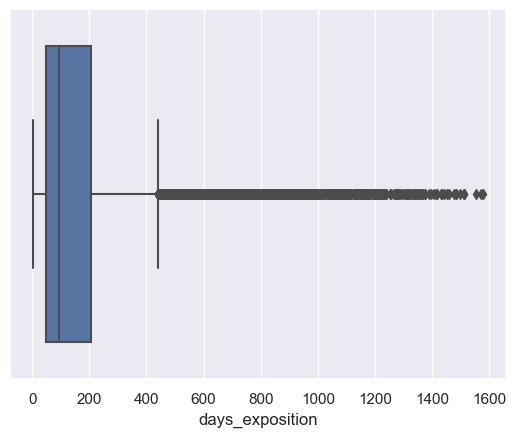

In [42]:
# Displaying a boxplot
sns.boxplot(data=data, x="days_exposition")
plt.show()

So, we observe the following. Normal values fall within the range from 1 to 440.5 (`Q3 + 1.5*(Q3-Q1) = 440.5`). Everything outside the borders is considered outliers, that is, very different values. In this case, such values can be interpreted as real estate objects, the sale of which took an unusually long time. As for the fastest sales, such values are contained inside the "box": in this interval between the first and third quartiles, the largest number of normal values is concentrated, which means more information about such sales. Thus, the fastest sales are those that took from 48 to 205 days, while sales that took a much longer period start from 441 days.

## Price factors analysis

Now let's look at what factors influence the price of a property. Consider the dependencies of the price on the following factors:

* `total_area` => total area;
* `living_area` => living area;
* `kitchen_area` => kitchen area;
* `rooms` => number of rooms;
* `floor_type` => floor type;
* `weekday_exposition` => the day of the week of the ad placement;
* `month_exposition` => month of ad placement;
* `year_exposition` => year of ad placement.

The dependence of these factors can be studied by plotting scatterplots. First, let's look at the numeric columns and build such graphs for them and give the corresponding values of the Pearson correlation coefficient, where applicable.

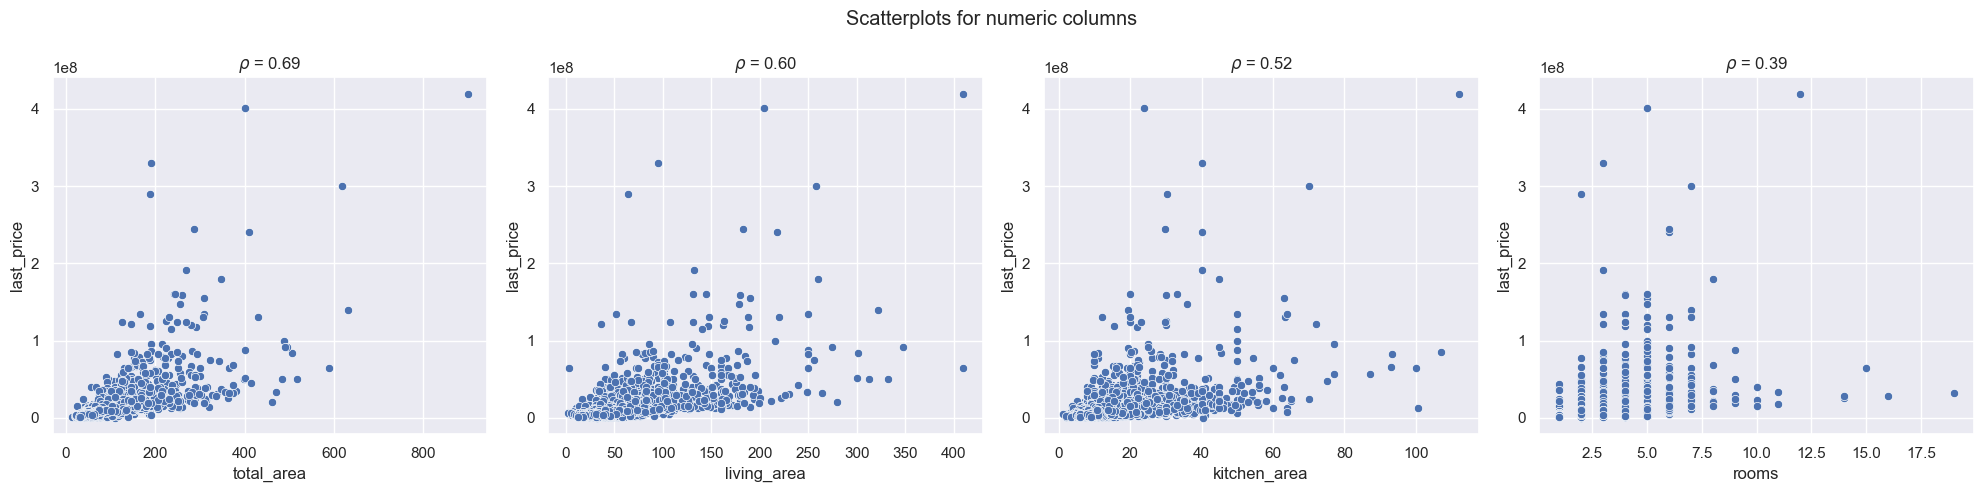

In [43]:
# Making scatterplots for numeric columns
numeric_cols = ["total_area", "living_area", "kitchen_area", "rooms"]

fig, axes = plt.subplots(1, 4, figsize=(5 * 4, 5 * 1))
fig.suptitle("Scatterplots for numeric columns")
for col, ax in zip(numeric_cols, axes):
    corr = data[col].corr(data["last_price"])
    f = sns.scatterplot(data=data, x=col, y="last_price", ax=ax)
    f.set(title=rf"$\rho$ = {corr:.2f}")
plt.tight_layout()
plt.show()

So, we observe the following. The first three columns, namely `total_area`, `living_area` and `kitchen_area`, quite clearly show a positive relationship with the value of the property, as can be seen from the calculated correlations: all such values exceed 0.5. In other words, the larger the area of any part of the housing, the higher the value of this object, which is realistic and makes sense. Next, let's look at the relationship between the number of rooms and the cost of housing. The connection here is somewhat weaker, as can be seen from the graph and the correlation coefficient. There are observations where the more rooms, the higher the cost, but we can also find points where fewer rooms leads to higher prices.

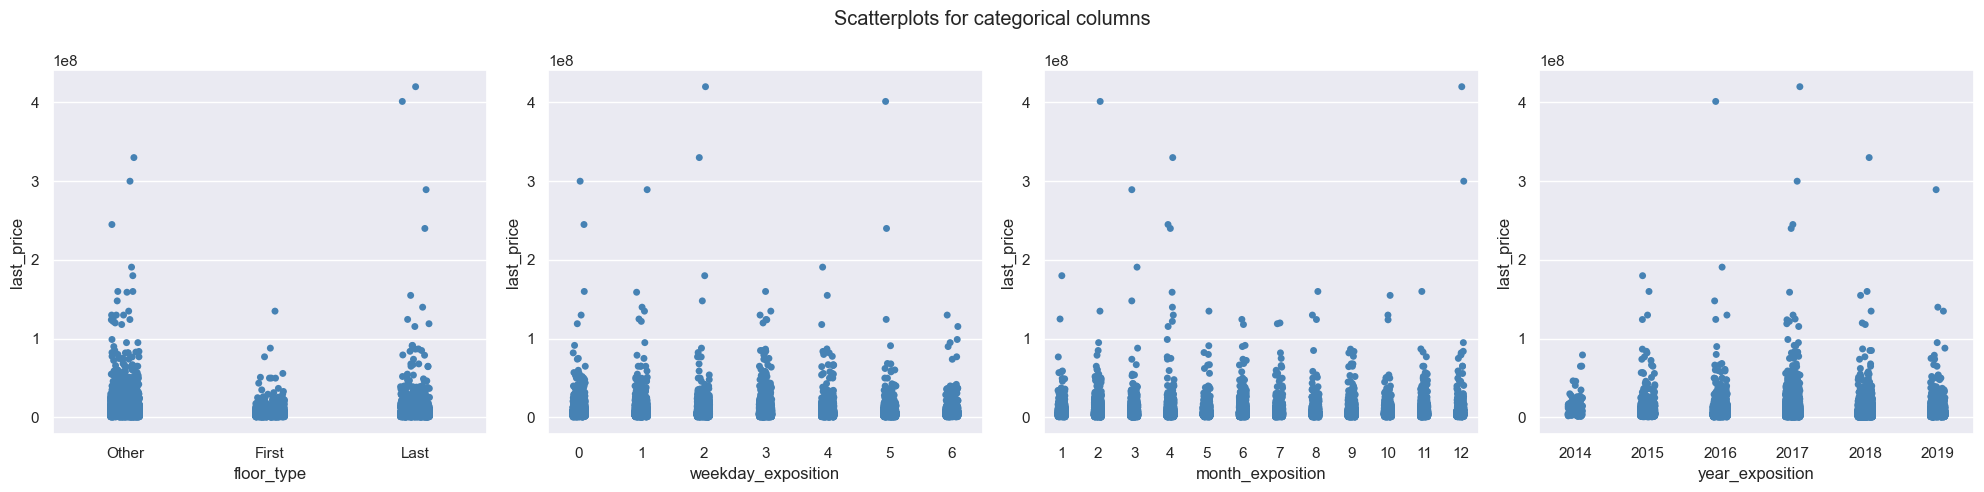

In [44]:
# Making scatterplots for categorical columns
cat_cols = ["floor_type", "weekday_exposition", "month_exposition", "year_exposition"]

fig, axes = plt.subplots(1, 4, figsize=(5 * 4, 5 * 1))
fig.suptitle("Scatterplots for categorical columns")
for col, ax in zip(cat_cols, axes):
    sns.stripplot(data=data, x=col, y="last_price", ax=ax, color="steelblue")
plt.tight_layout()
plt.show()

Same logic applies to categorical columns as well. It is not quite clear whether publication weekday, month, year and floor type actually affect the market valuation of real estate objects: there is not a clear trend visible. Thus, the relationship is especially weak here.

## Top-10 localities

In order to find the top 10 localities by the number of ads, we can use the `value_counts()` method for a column containing the names of locations - `locality_name`. In fact, the number of repetitions of a certain location in the DataFrame is the number of ads inherent in this location.

In [45]:
# Displaying top-10 localities by the number of ads
top_10_locations_expositions = data["locality_name"].value_counts()[:10]
top_10_locations_expositions

Санкт-Петербург    14034
Мурино               459
Шушары               392
Кудрово              376
Всеволожск           357
Пушкин               337
Колпино              322
Гатчина              290
Парголово            288
Петергоф             190
Name: locality_name, dtype: int64

From the DataFrame, we will make a pivot table for each location to calculate the average price per square meter, then we will select data only for those locations that have the largest number of ads. This can be easily done by applying the `query()` method to the pivot table, where we will make a request to output only those positions (string indexes) that are present in `top_10_locations_expositions`. Additionally, we will sort the resulting result. We write the following series of method calls.

In [46]:
# Calculating the average price for top-10 ad localities
(
    data.pivot_table(index="locality_name", values="price_per_sq_meter")
    .query("locality_name in @top_10_locations_expositions.index")
    .sort_values(by="price_per_sq_meter", ascending=False)
)

,price_per_sq_meter
locality_name,
Санкт-Петербург,113919.013188
Пушкин,103291.299054
Кудрово,95269.611676
Парголово,90756.003417
Мурино,85751.594348
Петергоф,83754.204102
Шушары,78393.702167
Колпино,75226.296359
Всеволожск,69029.150099


## Distances analysis

Now let's analyze real estate objects in St. Petersburg. For convenience, we will compile a pivot table `data_sbp_pivot` and calculate the average price per square meter of the object for each kilometer of its distance from the city center in the column `cityCentres_nearest_km`.

In [47]:
# Calculating average price in Saint-Petersburg for each kilometer
data_spb_pivot = data.query("locality_name in 'Санкт-Петербург'").pivot_table(
    index="cityCenters_nearest_km", values="price_per_sq_meter"
)
display(data_spb_pivot)

,price_per_sq_meter
cityCenters_nearest_km,
0,189999.465544
1,160719.779510
2,149307.330215
3,124329.483914
4,134862.606065
5,145381.180890
6,149832.976252
7,142516.309187
8,120007.398741


At first glance, we can notice a trend: the further the object is located from the city center, the lower the average price per square meter. For clarity and confirmation of this observation, we will plot the resulting pivot table `data_spb_pivot`.

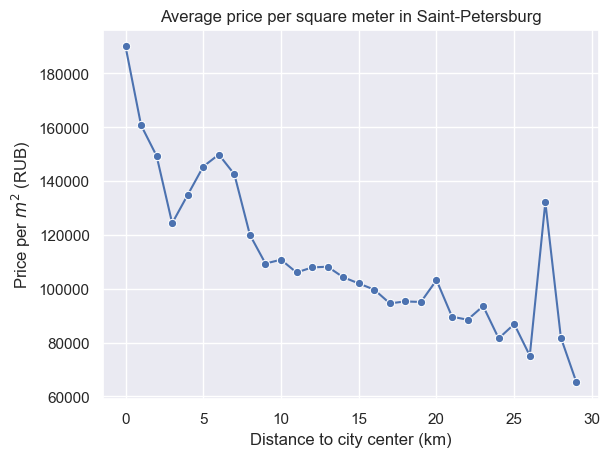

In [48]:
# Making a plot for Saint-Petersburg prices
figure = sns.lineplot(data=data_spb_pivot, marker="o", legend=None)
figure.set(
    title="Average price per square meter in Saint-Petersburg",
    xlabel="Distance to city center (km)",
    ylabel=r"Price per $m^2$ (RUB)",
)
plt.show()

Indeed, there is a tendency of the average price per square meter to decrease as we move away from the city center. Of course, there are some spikes: in particular, in the area of 5-7 km and 27 km from the center, but basically the trend remains downward.

**Conclusion**

Thus, as a result of the exploratory data analysis, it was found that in most cases people sell real estate objects that are located on the middle floors in November-April. Further, the fastest purchases are made between 48-205 days, and purchases made over 441 days are considered abnormally slow. The most informative factors for the market price of an object are the area indicators: total area, living area and kitchen area, while the other factors are not that strongly correlated with real estate objects prices. Among the top-10 localities in terms of the number of ads, St. Petersburg is considered the most expensive city in terms of the average price per square meter. Finally, the more distant the object is from the city center in the city of St. Petersburg, the lower the price is set for it.

# General conclusion

As a result of the conducted research, a database of real estate objects obtained from "Yandex Real Estate" was considered. Problems with missing values, data types, as well as the presence of implicit duplicates and abnormal values were identified, all of which were resolved to some extent at the data preprocessing stage. Next, according to the results of the exploratory data analysis, the most important determinants of the value of real estate objects were the total area, living area and kitchen area. The fastest real estate purchases are usually made within 48-205 days, and all those that last more than 441 days are unusually long. St. Petersburg turned out to be the most expensive city in terms of housing prices.